In [103]:
import numpy as np
from functions import convolve2d
K_downOnly = np.array([[-1],[1]])
K_withAntimatter = np.array([[-1],[0],[1]])/2
K_gradient = K_withAntimatter

M = np.concatenate([np.ones([20,10]), np.zeros([20,10])])
v = 0.1  ## V ∈ [-1, 1]  relativ to Vmax aka c
#V = v*np.ones_like(M)
#V = v*np.concatenate([np.ones([20,5]), np.zeros([20,5])], axis=1)

KavgMore = [[0.3],[0.4],[0.3]]
KavgLess = [[0.2], [0.6], [0.2]]
KavgBarely = [[0.1], [0.8], [0.1]]
def average(M, Kavg):
    return convolve2d(M, Kavg, mode="same", boundary="wrap")
    
def step(M, V, clip=False, Kavg=KavgBarely):
    Gradient = convolve2d(M*V, K_gradient, mode="same", boundary="wrap")
    M_step = M + Gradient
    if clip:
        M = np.clip(M_step, 0, 1)
    else:
        M = average(M_step, Kavg)
    return M

## vertical translation with 10 different speeds (one column each)
V = np.concatenate([(0.5-column/10)*np.ones([40,1]) for column in range(10)], axis=1)
print("V:", V[0])
results = []
for _step in range(40):
    M = step(M, V)
    results.append(M)
with np.printoptions(linewidth=200, formatter={'float': lambda x: "{: .3f}".format(x)}):
    print(results[0], "\n", np.sum(M), "\n")

V: [ 0.5  0.4  0.3  0.2  0.1  0.  -0.1 -0.2 -0.3 -0.4]
[[ 0.675  0.720  0.765  0.810  0.855  0.900  0.945  0.990  1.035  1.080]
 [ 0.975  0.980  0.985  0.990  0.995  1.000  1.005  1.010  1.015  1.020]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.0

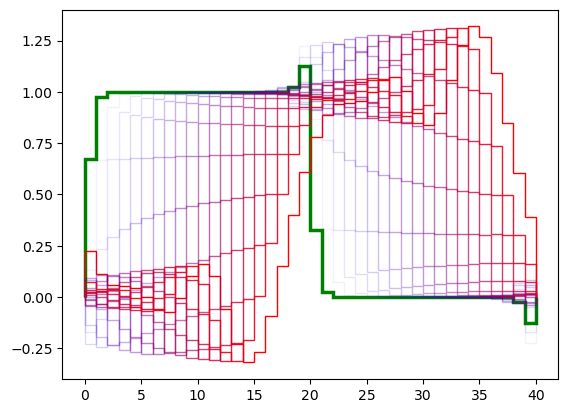

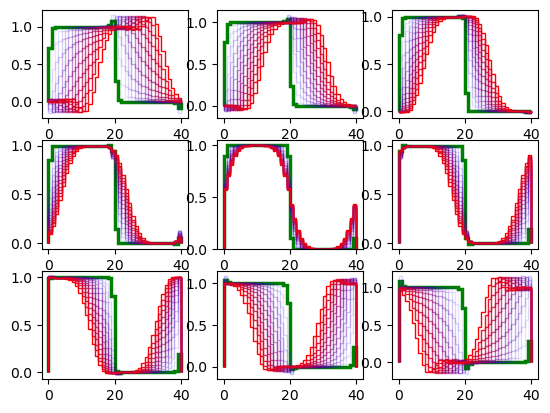

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def plot(ax, results, column):
    ax.stairs(results[0].T[column], color='green', linewidth=2.5)
    ax.stairs(results[-1].T[column], color='red')
    for s in range(2, len(results)-2, 2):
        s_rel = s/len(results)
        ax.stairs(results[s].T[column], color=[s_rel, 0, 1-s_rel], alpha=s_rel)

fig, ax = plt.subplots()
plot(ax, results, 0)
plt.show()

fig, axs = plt.subplots(3,3)
for column in range(1,10):
    ax = axs.flatten()[column-1]
    plot(ax, results, column)
plt.show()